# Predicting China Scholarship additional cost

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# We are going to read the csv file using read_csv() function
data = pd.read_csv(r'C:\Users\8560W\Desktop\hamoye_internship\prophet\Hamoye-Prophet-Team-main\data\cleaned.csv')

In [3]:
# We are going to rename the columns using the snake_case naming convention to improve readability
data.columns = ['school_id', 'university', 'major', 'level', 'language', 'tuition_covered', 'accomodation_covered',
'living_expense_covered', 'tuition_fees_to_pay', 'original_tuition_fee','start_month','start_year', 'accomodation_to_pay',
'accomodation_duration', 'expense_to_pay', 'expense_duration']

In [4]:
# Let us view an intuitive summary of our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school_id               3576 non-null   int64  
 1   university              3576 non-null   object 
 2   major                   3576 non-null   object 
 3   level                   3576 non-null   object 
 4   language                3576 non-null   object 
 5   tuition_covered         3453 non-null   float64
 6   accomodation_covered    3576 non-null   int64  
 7   living_expense_covered  3576 non-null   int64  
 8   tuition_fees_to_pay     3576 non-null   int64  
 9   original_tuition_fee    3453 non-null   float64
 10  start_month             3576 non-null   object 
 11  start_year              3576 non-null   int64  
 12  accomodation_to_pay     3576 non-null   float64
 13  accomodation_duration   3576 non-null   object 
 14  expense_to_pay          3576 non-null   

In [5]:
# Now let us see a preview of the data by looking at the first 5 rows 
data.head()

,school_id,university,major,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0.0,YEAR,0.0,MONTH


In [6]:
# Let us also look at the last 5 rows of the dataframe
data.tail()

,school_id,university,major,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration
3571,3601,East China University of Science and Technology,Environmental Science and Engineering,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3572,3602,East China University of Science and Technology,Power Engineering and Engineering Thermophysics,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3573,3603,East China University of Science and Technology,Thermal Engineering,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3574,3604,East China University of Science and Technology,Synthesis of Fine Chemical and Molecular,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3575,3605,East China University of Science and Technology,Sociology of Law,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH


In [7]:
# Let us see how many null values present in the columns 
data.isna().sum()

school_id                   0
university                  0
major                       0
level                       0
language                    0
tuition_covered           123
accomodation_covered        0
living_expense_covered      0
tuition_fees_to_pay         0
original_tuition_fee      123
start_month                 0
start_year                  0
accomodation_to_pay         0
accomodation_duration       0
expense_to_pay              0
expense_duration            0
dtype: int64

In [44]:
data1 = data.fillna({'tuition_covered':data['tuition_covered'].mean(),'original_tuition_fee':data['original_tuition_fee'].mean()})
data1.head(3)

,school_id,university,major,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH


In [46]:
data1.accomodation_covered.value_counts()

0    2743
1     833
Name: accomodation_covered, dtype: int64

In [84]:
data1.living_expense_covered.value_counts()

0    2678
1     898
Name: living_expense_covered, dtype: int64

In [92]:

accomodation_covered=data1.groupby('accomodation_covered')['university'].value_counts()

In [95]:
accomodation_covered[0].count()

47

In [96]:
accomodation_covered[1].count()

21

In [9]:
data1.isnull().sum().sum()

0

In [10]:
data1.dtypes

school_id                   int64
university                 object
major                      object
level                      object
language                   object
tuition_covered           float64
accomodation_covered        int64
living_expense_covered      int64
tuition_fees_to_pay         int64
original_tuition_fee      float64
start_month                object
start_year                  int64
accomodation_to_pay       float64
accomodation_duration      object
expense_to_pay            float64
expense_duration           object
dtype: object

In [41]:
data1 = data.drop(['school_id'],axis = 1)


In [100]:
len(data1.university.value_counts())

53

In [12]:
num_data=data[['tuition_covered', 'tuition_fees_to_pay', 'original_tuition_fee', 'accomodation_to_pay', 'expense_to_pay']]
num_data.head(3)

,tuition_covered,tuition_fees_to_pay,original_tuition_fee,accomodation_to_pay,expense_to_pay
0,7500.0,0,7500.0,9750.0,1000.0
1,10000.0,10000,20000.0,1500.0,1500.0
2,10000.0,10000,20000.0,1500.0,1500.0


In [13]:
corr = num_data.corr()

<AxesSubplot:>

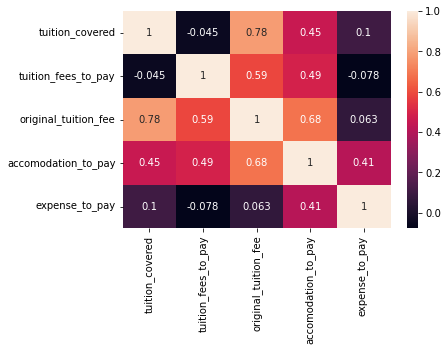

In [14]:
sns.heatmap(corr,annot=True)

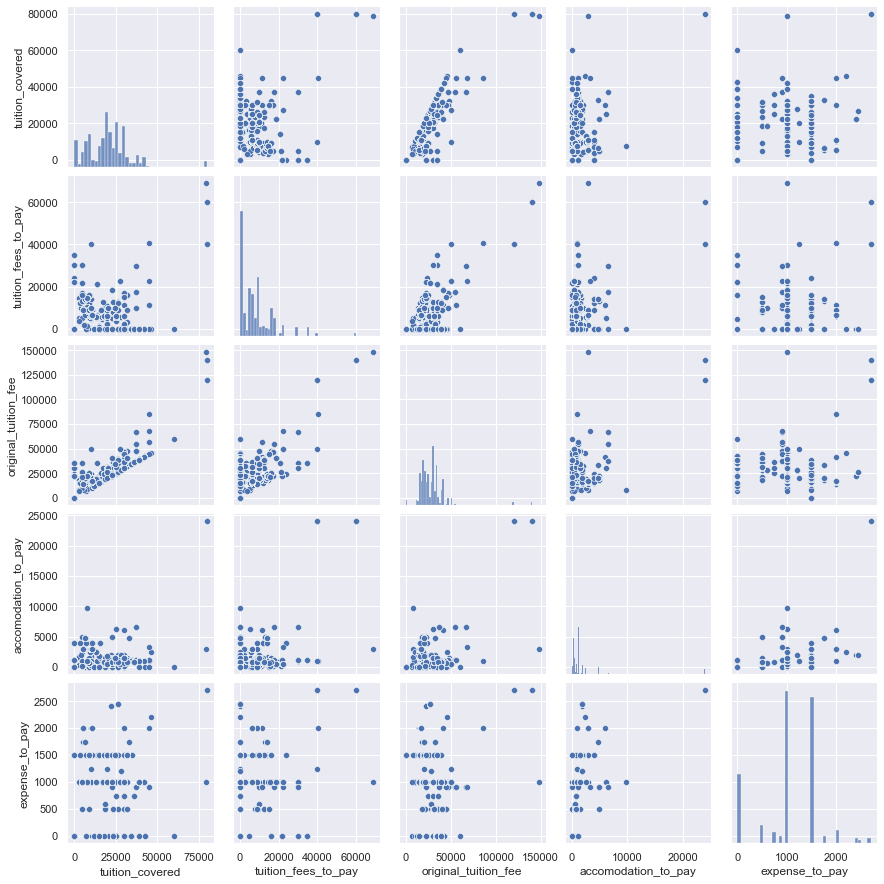

In [43]:
sns.pairplot(num_data)

In [15]:
# Let us view the descriptive statistics of the dataframe. Note that this can only be applied to numerical values 
data[['tuition_covered', 'tuition_fees_to_pay', 'original_tuition_fee', 'accomodation_to_pay', 'expense_to_pay']].describe().T

,count,mean,std,min,25%,50%,75%,max
tuition_covered,3453.0,20531.704315,12428.124918,0.0,10625.0,20000.0,26500.0,80000.0
tuition_fees_to_pay,3576.0,8433.516499,9519.340675,0.0,0.0,6000.0,11000.0,69000.0
original_tuition_fee,3453.0,28693.955980,15341.450293,0.0,20000.0,26500.0,34000.0,148000.0
accomodation_to_pay,3576.0,1376.461969,2802.526970,0.0,400.0,900.0,1200.0,24000.0
expense_to_pay,3576.0,1070.987136,601.297528,0.0,1000.0,1000.0,1500.0,2700.0


In [16]:
# Notice that the min values for all the selected columns are 0
# Let us see how many 'O' values these columns have 

print(len(data[data['tuition_covered'] == 0]))
print(len(data[data['tuition_fees_to_pay'] == 0]))
print(len(data[data['original_tuition_fee'] == 0]))
print(len(data[data['accomodation_to_pay'] == 0]))
print(len(data[data['expense_to_pay'] == 0]))

220
1007
42
437
561


In [17]:
# Let us define the predictor columns and the target column 
# X is the predictor
# y is the target variable
X = data.drop(['tuition_fees_to_pay'], axis = 1)
y = data['tuition_fees_to_pay']

In [18]:
# Here we are differentiating between the columns that are objects and the ones that are not
obj_cols = list(X.select_dtypes(include = 'object').columns)
num_cols = list(X.select_dtypes(exclude = 'object').columns)
print(obj_cols)
print(num_cols)

['university', 'major', 'level', 'language', 'start_month', 'accomodation_duration', 'expense_duration']
['school_id', 'tuition_covered', 'accomodation_covered', 'living_expense_covered', 'original_tuition_fee', 'start_year', 'accomodation_to_pay', 'expense_to_pay']


In [19]:
# Now we are going to fill the empty points with mean of the values in the column 
null = ['tuition_covered', 'original_tuition_fee']
for col in null:
    X[col] = X[col].fillna(X[col].mean())
X.isna().sum()

school_id                 0
university                0
major                     0
level                     0
language                  0
tuition_covered           0
accomodation_covered      0
living_expense_covered    0
original_tuition_fee      0
start_month               0
start_year                0
accomodation_to_pay       0
accomodation_duration     0
expense_to_pay            0
expense_duration          0
dtype: int64

In [20]:
# Let us use the LabelEncoder for the columns that are objects
X1 = X.copy().drop(['school_id'], axis = 1)
for col in obj_cols:
    le = LabelEncoder()
    X1[col] = le.fit_transform(X1[col])
X1

,university,major,level,language,tuition_covered,accomodation_covered,living_expense_covered,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration
0,33,1135,2,1,7500.0,0,0,7500.0,2,2020,9750.0,2,1000.0,0
1,6,1017,2,0,10000.0,0,0,20000.0,4,2019,1500.0,2,1500.0,0
2,6,1016,2,0,10000.0,0,0,20000.0,4,2019,1500.0,2,1500.0,0
3,6,1018,2,0,10000.0,0,0,20000.0,4,2019,1500.0,2,1500.0,0
4,26,748,2,0,7000.0,1,1,7000.0,4,2019,0.0,5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,16,492,3,1,38950.0,1,1,38950.0,4,2019,0.0,5,0.0,0
3572,16,1011,3,1,38950.0,1,1,38950.0,4,2019,0.0,5,0.0,0
3573,16,1191,3,1,38950.0,1,1,38950.0,4,2019,0.0,5,0.0,0
3574,16,1143,3,1,38950.0,1,1,38950.0,4,2019,0.0,5,0.0,0


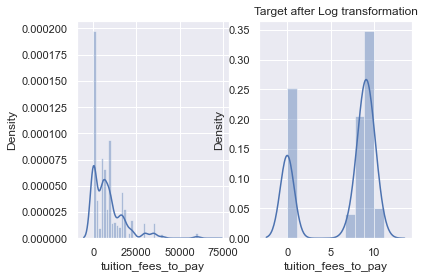

In [21]:
# Let us see what our target looks like visually after a log transformation
sns.set()
y_transformed = pd.Series(np.log1p(y))

fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after Log transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y_transformed, ax=ax[1])
plt.show()

In [22]:
# We are splitting the test and train dataset we will do it for the normal values 
# and the transformed values 
xtrain, xtest, ytrain, ytest = train_test_split(X1, y)
xtrain_t, xtest_t, ytrain_t, ytest_t = train_test_split(X1, y_transformed)

In [23]:
# Let us import RandomForestRegressor to fit our data
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf1 = RandomForestRegressor()
rf.fit(xtrain,ytrain)
rf1.fit(xtrain_t, ytrain_t)

RandomForestRegressor()

In [24]:
# Let us validate our model
val = rf.predict(xtest)
val2 = np.expm1(rf1.predict(xtest_t))
print('Mae Normal -', mean_absolute_error(val, ytest))
print('Mae trans -', mean_absolute_error(val2, np.expm1(ytest_t)))

Mae Normal - 61.15296420581655
Mae trans - 122.51220822990034


APPLYING SCALER TO SEE IF IT IMPROVES ACCURACY AND REDUCES MAE

In [25]:
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X1)
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X2, y)
xtrain_t1, xtest_t1, ytrain_t1, ytest_t1 = train_test_split(X2, y_transformed)

In [26]:
rf2 = RandomForestRegressor()
rf3 = RandomForestRegressor()
rf2.fit(xtrain1, ytrain1)
rf3.fit(xtrain_t1, ytrain_t1)

RandomForestRegressor()

In [27]:
val3 = rf2.predict(xtest1)
val4 = np.expm1(rf3.predict(xtest_t1))
print('Mae Normal -', mean_absolute_error(val3, ytest1))
print('Mae trans -', mean_absolute_error(val4, np.expm1(ytest_t1)))

Mae Normal - 30.916387024608504
Mae trans - 109.84158168601292


USING DUMMIES TO SEE IF IT IMPROVES ACCURACY ALSO

In [28]:
dummy_X = pd.get_dummies(X1, columns = obj_cols)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y)
xtrain_t2, xtest_t2, ytrain_t2, ytest_t2 = train_test_split(X2, y_transformed)

In [29]:
rf4 = RandomForestRegressor()
rf5 = RandomForestRegressor()
rf4.fit(xtrain2, ytrain2)
rf5.fit(xtrain_t2, ytrain_t2)

RandomForestRegressor()

In [30]:
val5 = rf4.predict(xtest)
val6 = np.expm1(rf5.predict(xtest_t1))
print('Mae Normal -', mean_absolute_error(val5, ytest1))
print('Mae trans -', mean_absolute_error(val6, np.expm1(ytest_t1)))

Mae Normal - 52281.52147651007
Mae trans - 50.101041115309265
